In [3]:
import pandas as pd
import seaborn as sns
import numpy as npz
from config import *
import matplotlib.pyplot as plt
from N_plotting_utils import *

In [1]:
dimension=3
algorithm_portfolio='DE-GA-ES-PSO-CMAES'
benchmarks_to_plot=['random','bbob']
fig, axes = plt.subplots(nrows=len(benchmarks_to_plot), ncols=1, figsize=(5,10))

for benchmark_index, benchmark in enumerate(benchmarks_to_plot):
    portfolio_bests=pd.DataFrame()
    best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_best_algorithm_per_instance.csv', index_col=0)
    best=best.groupby(['algorithm_name','budget']).count()['best_y'].reset_index()
    best['benchmark']=benchmark_name_mapping(benchmark)
    portfolio_bests=pd.concat([portfolio_bests, best])

    #ax=sns.catplot(portfolio_bests,x='algorithm_name', col='budget', y='best_y', kind='bar', row='benchmark',sharey=False)
    print(benchmark)
    
    sns.heatmap(portfolio_bests.pivot(index='budget', columns='algorithm_name', values='best_y').T.fillna(0),annot=True,fmt='.2f',cmap='YlGnBu', ax=axes[benchmark_index])
    axes[benchmark_index].set_title(f'Benchmark: {benchmark_name_mapping(benchmark)}')
plt.tight_layout()   
plt.savefig(f'{data_dir}/figures_results/best_algorithms_per_benchmark_{algorithm_portfolio}_{dimension}d.pdf')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
dimension=3
algorithm_portfolio='DE-GA-ES-PSO-CMAES'
benchmarks_to_plot=['random','bbob']
fig, axes = plt.subplots(nrows=len(benchmarks_to_plot), ncols=1, figsize=(len(benchmarks_to_plot), len(benchmarks_to_plot)*2))

for benchmark_index, benchmark in enumerate(benchmarks_to_plot):
    portfolio_bests=pd.DataFrame()
    best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_best_algorithm_per_instance.csv', index_col=0)
    best=best.groupby(['algorithm_name','budget']).count()['best_y'].reset_index()
    best['benchmark']=benchmark_name_mapping(benchmark)
    portfolio_bests=pd.concat([portfolio_bests, best])

    #ax=sns.catplot(portfolio_bests,x='algorithm_name', col='budget', y='best_y', kind='bar', row='benchmark',sharey=False)
    print(benchmark)
    
    sns.heatmap(portfolio_bests.pivot(index='budget', columns='algorithm_name', values='best_y').T.fillna(0),annot=True,fmt='.2f',cmap='YlGnBu', ax=axes[benchmark_index])
    axes[benchmark_index].set_title(f'Benchmark: {benchmark_name_mapping(benchmark)}')
plt.tight_layout()   
plt.savefig(f'{data_dir}/figures_results/best_algorithms_per_benchmark_{algorithm_portfolio}_{dimension}d.pdf')
plt.show()


In [7]:
dimension=3
algorithm_portfolio='PSO1-PSO2-PSO3-PSO4-PSO8-PSO10'
benchmark='affine_full'
best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_column_normalized_score.csv', index_col=0)

In [15]:
best.query('budget==30').reset_index().pivot(index='f',columns='algorithm_name',values='algorithm_rank').loc['p4_p6_i1_i1_a0.25']

algorithm_name
PSO1     0.000027
PSO10    0.129235
PSO2     0.592657
PSO3     0.021511
PSO4     0.442838
PSO8     0.841218
Name: p4_p6_i1_i1_a0.25, dtype: float64

random
bbob


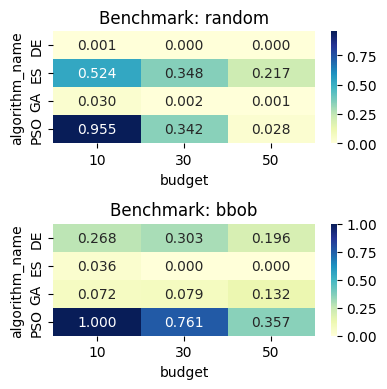

In [7]:
dimension=2
algorithm_portfolio='DE-GA-ES-PSO'

benchmarks_to_plot=['random','bbob']
fig, axes = plt.subplots(nrows=len(benchmarks_to_plot), ncols=1, figsize=(len(benchmarks_to_plot)*2, len(benchmarks_to_plot)*2))

for benchmark_index, benchmark in enumerate(benchmarks_to_plot):
    portfolio_bests=pd.DataFrame()
    best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_column_normalized_score.csv', index_col=0)
    best=best.groupby(['algorithm_name','budget']).median()['algorithm_rank'].reset_index()
    best['benchmark']=benchmark
    portfolio_bests=pd.concat([portfolio_bests, best])

    #ax=sns.catplot(portfolio_bests,x='algorithm_name', col='budget', y='best_y', kind='bar', row='benchmark',sharey=False)
    print(benchmark)
    
    sns.heatmap(portfolio_bests.pivot(index='budget', columns='algorithm_name', values='algorithm_rank').T.fillna(0),annot=True,fmt='.3f',cmap='YlGnBu', ax=axes[benchmark_index])
    axes[benchmark_index].set_title(f'Benchmark: {benchmark}')
plt.tight_layout()   
#plt.savefig(f'{data_dir}/figures_results/mean_algorithm_score_per_benchmark_{algorithm_portfolio}_{dimension}d.pdf')
plt.show()


In [ ]:
dimension=3
algorithm_portfolio='PSO1-PSO2-PSO3-PSO4-PSO8-PSO10'
algorithm_portfolio='DE-GA-ES-PSO'
benchmarks_to_plot=['random','affine','bbob','m4','cec']
fig, axes = plt.subplots(nrows=len(benchmarks_to_plot), ncols=1, figsize=(len(benchmarks_to_plot), len(benchmarks_to_plot)*2))

for benchmark_index, benchmark in enumerate(benchmarks_to_plot):
    portfolio_bests=pd.DataFrame()
    best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_column_normalized_score.csv', index_col=0)
    best=best.groupby(['algorithm_name','budget']).mean()['algorithm_rank'].reset_index()
    best['benchmark']=benchmark_name_mapping(benchmark)
    portfolio_bests=pd.concat([portfolio_bests, best])

    #ax=sns.catplot(portfolio_bests,x='algorithm_name', col='budget', y='best_y', kind='bar', row='benchmark',sharey=False)
    print(benchmark)
    
    sns.heatmap(portfolio_bests.pivot(index='budget', columns='algorithm_name', values='algorithm_rank').T.fillna(0),annot=True,fmt='.2f',cmap='YlGnBu', ax=axes[benchmark_index])
    axes[benchmark_index].set_title(f'Benchmark: {benchmark_name_mapping(benchmark)}')
plt.tight_layout()   
plt.savefig(f'{data_dir}/figures_results/mean_algorithm_score_per_benchmark_{algorithm_portfolio}_{dimension}d.pdf')
plt.show()


In [ ]:
y_pred=pd.DataFrame([[0,0.1,1], [0,0.1,1]], columns=['DE','GA','ES'])
y_pred.index.name='index'
y_true=pd.DataFrame([[0.4,0.1,1], [0,0.2,1]], columns=['DE','GA','ES'])
y_true.index.name='index'

In [ ]:
y_pred_new=y_pred.reset_index().melt(id_vars=y_true.index.names, value_vars=y_true.columns, var_name='algorithm_name').sort_values(y_true.index.names+['value']).reset_index()

y_pred_new['algorithm_rank']=[i%len(y_true.columns) for i in y_pred_new.index]

y_true_new=y_true.reset_index().melt(id_vars=y_true.index.names, value_vars=y_true.columns, var_name='algorithm_name').sort_values(y_true.index.names+['value']).reset_index()

y_true_new=y_true_new.rename(columns={'value':'algorithm_score_true'})
y_true_new['algorithm_rank']=[i%len(y_true.columns) for i in y_true_new.index]

t=y_pred_new.merge(y_true_new,left_on=list(y_true.index.names)+['algorithm_name'], right_on=list(y_true.index.names)+['algorithm_name'], suffixes=['_predicted','_true'],)
of_interest=t.query('algorithm_rank_predicted==0').copy()
of_interest.loc[:,'score']=[1-x for x in of_interest['algorithm_score_true'].values]

In [ ]:
of_interst

In [ ]:
t.query('algorithm_rank_predicted==0').merge(t.query('algorithm_rank_true==0'), left_on=['index'], right_on=['index'])

In [ ]:
of_interest

In [ ]:
dimension=3
algorithm_portfolio='DE-GA-ES-PSO'
benchmarks_to_plot=['random','affine','bbob','m4']

all_performance=pd.DataFrame()
for benchmark_index, benchmark in enumerate(benchmarks_to_plot):

    best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_column_normalized_score.csv', index_col=0)
    best['benchmark']=benchmark
    all_performance=pd.concat([all_performance,best])
plt.figure()
sns.displot(all_performance, x="algorithm_rank", hue="algorithm_name", col="budget",kind='kde', row='benchmark',aspect=1.2,height=3,clip=(0,1))
plt.tight_layout()   
plt.savefig(f'{data_dir}/figures_results/best_algorithms_per_benchmark_{algorithm_portfolio}_{dimension}d_density.pdf')
plt.show()


In [ ]:
dimension=3
algorithm_portfolio='DE-GA-ES-PSO'
benchmarks_to_plot=['random','affine','bbob','m4']

all_performance=pd.DataFrame()
for benchmark_index, benchmark in enumerate(benchmarks_to_plot):

    best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_column_normalized_score.csv', index_col=0)
    best['benchmark']=benchmark

    all_performance=pd.concat([all_performance,best])

print(all_performance)
plt.figure()
sns.displot(all_performance, x="algorithm_rank", hue="algorithm_name", col="budget",kind='kde', row='benchmark',palette=color_palette_4,aspect=1.2,height=3,clip=(0,1))
plt.tight_layout() 

In [ ]:
dimension=3
algorithm_portfolio='DE-GA-ES-PSO'
benchmarks_to_plot=['random','affine','bbob','m4']

all_performance=pd.DataFrame()
for benchmark_index, benchmark in enumerate(benchmarks_to_plot):

    best=pd.read_csv(f'{data_dir}/algorithm_performance/{benchmark}_{dimension}d_{algorithm_portfolio}_column_normalized_score.csv', index_col=0)
    best['benchmark']=benchmark
    for a in algorithm_portfolio.split('-'):
        for budget in best['budget'].drop_duplicates().values:

            fs=best.query('algorithm_name==@a and algorithm_rank==0 and budget==@budget').sample(50, replace=True).index[:50 ]
            all_performance=pd.concat([all_performance,best.query('budget==@budget').loc[fs]])
            print(all_performance.shape)
plt.figure()
sns.displot(all_performance, x="algorithm_rank", hue="algorithm_name", col="budget",kind='kde', row='benchmark',palette=color_palette_4,aspect=1.2,height=3,clip=(0,1))
plt.tight_layout() 

In [ ]:
all_performance.query('algorithm_rank==0').groupby(['algorithm_name','budget','benchmark']).count()